In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
# Load the data
train_home_team_statistics_df = pd.read_csv('train_home_team_statistics_df.csv', index_col = 0)
train_away_team_statistics_df = pd.read_csv('train_away_team_statistics_df.csv', index_col = 0)
train_scores = pd.read_csv('Y_train_1rknArQ.csv', index_col = 0)

In [3]:
train_home_team_statistics_df

LEAGUE                TEAM_NAME  TEAM_SHOTS_TOTAL_season_sum  \
ID                                                                            
0             Ligue 1                 Toulouse                          3.0   
1             Ligue 2                    Brest                          6.0   
2             Serie A                Sampdoria                          4.0   
3          League One            Coventry City                          7.0   
4      Premier League  Wolverhampton Wanderers                          3.0   
...               ...                      ...                          ...   
12298      League One          Southend United                          4.0   
12299   Liga Portugal                 Boavista                          4.0   
12300      Bundesliga               Schalke 04                          4.0   
12301      League One           Fleetwood Town                          2.0   
12302         La Liga                 Valencia                          2.0   

       TEAM_SHOTS_INSIDEBOX_season_sum  TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                                                         
0                                  2.0                               5.0   
1                                  8.0                               3.0   
2                                  2.0                               5.0   
3                                  5.0                               5.0   
4                                  3.0                               2.0   
...                                ...                               ...   
12298                              2.0                               3.0   
12299                              2.0                               3.0   
12300                              3.0                               5.0   
12301                              NaN                               1.0   
12302                              3.0                               1.0   

       TEAM_SHOTS_ON_TARGET_season_sum  TEAM_SHOTS_OUTSIDEBOX_season_sum  \
ID                                                                         
0                                  2.0                               1.0   
1                                  6.0                               5.0   
2                                  2.0                               8.0   
3                                  6.0                               6.0   
4                                  3.0                               4.0   
...                                ...                               ...   
12298                              4.0                               7.0   
12299                              1.0                               5.0   
12300                              3.0                               5.0   
12301                              1.0                               NaN   
12302                              2.0                               2.0   

       TEAM_PASSES_season_sum  TEAM_SUCCESSFUL_PASSES_season_sum  \
ID                                                                 
0                         2.0                                2.0   
1                         8.0                                7.0   
2                         1.0                                1.0   
3                         9.0                                9.0   
4                         4.0                                3.0   
...                       ...                                ...   
12298                     4.0                                4.0   
12299                     1.0                                1.0   
12300                     1.0                                1.0   
12301                     NaN                                NaN   
12302                     3.0                                4.0   

       TEAM_SAVES_season_sum  ...  TEAM_YELLOWCARDS_5_last_match_std  \
ID                            ...                   

In [4]:
print("Column names :")

for column in train_home_team_statistics_df.columns:
    print(column)

Column names :
LEAGUE
TEAM_NAME
TEAM_SHOTS_TOTAL_season_sum
TEAM_SHOTS_INSIDEBOX_season_sum
TEAM_SHOTS_OFF_TARGET_season_sum
TEAM_SHOTS_ON_TARGET_season_sum
TEAM_SHOTS_OUTSIDEBOX_season_sum
TEAM_PASSES_season_sum
TEAM_SUCCESSFUL_PASSES_season_sum
TEAM_SAVES_season_sum
TEAM_CORNERS_season_sum
TEAM_FOULS_season_sum
TEAM_YELLOWCARDS_season_sum
TEAM_REDCARDS_season_sum
TEAM_OFFSIDES_season_sum
TEAM_ATTACKS_season_sum
TEAM_PENALTIES_season_sum
TEAM_SUBSTITUTIONS_season_sum
TEAM_BALL_SAFE_season_sum
TEAM_DANGEROUS_ATTACKS_season_sum
TEAM_INJURIES_season_sum
TEAM_GOALS_season_sum
TEAM_GAME_WON_season_sum
TEAM_GAME_DRAW_season_sum
TEAM_GAME_LOST_season_sum
TEAM_SHOTS_TOTAL_season_average
TEAM_SHOTS_INSIDEBOX_season_average
TEAM_SHOTS_OFF_TARGET_season_average
TEAM_SHOTS_ON_TARGET_season_average
TEAM_SHOTS_OUTSIDEBOX_season_average
TEAM_PASSES_season_average
TEAM_SUCCESSFUL_PASSES_season_average
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average
TEAM_SAVES_season_average
TEAM_CORNERS_season_avera

In [5]:
league_names = train_home_team_statistics_df['LEAGUE'].unique()

print("League names:")
for league in league_names:
    print(league)

League names:
Ligue 1
Ligue 2
Serie A
League One
Premier League
Liga Portugal
La Liga
Superliga
Bundesliga
Pro League
J-League
League Two
Eredivisie


In [6]:
team_names = train_home_team_statistics_df['TEAM_NAME'].unique()

print("Team names:")
for team in team_names:
    print(team)

Team names:
Toulouse
Brest
Sampdoria
Coventry City
Wolverhampton Wanderers
Sporting CP
Sevilla
Bordeaux
Lyngby
Borussia Dortmund
Genoa
Nîmes
Standard Liège
Urawa Reds
Crewe Alexandra
Celta de Vigo
Lincoln City
Colón
Grêmio
Troyes
Inter
Sassuolo
Racing Club
Chapecoense
Tottenham Hotspur
FC Groningen
Walsall
Levante
SC Heerenveen
SønderjyskE
Lorient
Sanfrecce Hiroshima
Real Valladolid
Paris Saint Germain
Yokohama
Colchester United
Blackpool
América Mineiro
Sint-Truiden
Stevenage
Bradford City
Cerezo Osaka
Milan
Yokohama F. Marinos
Flamengo
Vitesse
Nagoya Grampus
Brighton & Hove Albion
West Ham United
Olympique Lyonnais
Patronato
Hertha BSC
Carlisle United
Fortuna Sittard
Fleetwood Town
Juventus
Portsmouth
Belenenses
Northampton Town
Notts County
Gillingham
Atlético GO
Sunderland
Norwich City
Marítimo
Kashima Antlers
Forest Green Rovers
PSV
FC Augsburg
Randers
Eintracht Frankfurt
PEC Zwolle
Nancy
Fiorentina
Ipswich Town
Santos
Borussia Mönchengladbach
Benevento
De Graafschap
SD Eibar
Olym

In [7]:
for column in train_home_team_statistics_df.columns:
        number_of_missing_data = train_home_team_statistics_df[column].isnull().sum()
        print(f"{column}: {number_of_missing_data}")

LEAGUE: 0
TEAM_NAME: 0
TEAM_SHOTS_TOTAL_season_sum: 260
TEAM_SHOTS_INSIDEBOX_season_sum: 1385
TEAM_SHOTS_OFF_TARGET_season_sum: 0
TEAM_SHOTS_ON_TARGET_season_sum: 2
TEAM_SHOTS_OUTSIDEBOX_season_sum: 1387
TEAM_PASSES_season_sum: 1413
TEAM_SUCCESSFUL_PASSES_season_sum: 1384
TEAM_SAVES_season_sum: 780
TEAM_CORNERS_season_sum: 1
TEAM_FOULS_season_sum: 757
TEAM_YELLOWCARDS_season_sum: 5
TEAM_REDCARDS_season_sum: 34
TEAM_OFFSIDES_season_sum: 783
TEAM_ATTACKS_season_sum: 0
TEAM_PENALTIES_season_sum: 16
TEAM_SUBSTITUTIONS_season_sum: 46
TEAM_BALL_SAFE_season_sum: 363
TEAM_DANGEROUS_ATTACKS_season_sum: 0
TEAM_INJURIES_season_sum: 1960
TEAM_GOALS_season_sum: 4
TEAM_GAME_WON_season_sum: 8
TEAM_GAME_DRAW_season_sum: 15
TEAM_GAME_LOST_season_sum: 9
TEAM_SHOTS_TOTAL_season_average: 260
TEAM_SHOTS_INSIDEBOX_season_average: 1385
TEAM_SHOTS_OFF_TARGET_season_average: 0
TEAM_SHOTS_ON_TARGET_season_average: 2
TEAM_SHOTS_OUTSIDEBOX_season_average: 1386
TEAM_PASSES_season_average: 1413
TEAM_SUCCESSFUL_PASS

In [8]:
for league in league_names:    
    # print(league)
    league_data = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == league]
    team_names = league_data['TEAM_NAME'].unique()
    # print(team_names)
    for team in team_names:
        # print(team)
        team_data = league_data[league_data['TEAM_NAME'] == team]
        team_mean = team_data.select_dtypes(include = 'number').mean()
        # print(team_mean)
        train_home_team_statistics_df.loc[train_home_team_statistics_df['TEAM_NAME'] == team] = train_home_team_statistics_df.loc[train_home_team_statistics_df['TEAM_NAME'] == team].fillna(team_mean)

In [9]:
for column in train_home_team_statistics_df.columns:
        number_of_missing_data = train_home_team_statistics_df[column].isnull().sum()
        print(f"{column}: {number_of_missing_data}")

LEAGUE: 0
TEAM_NAME: 0
TEAM_SHOTS_TOTAL_season_sum: 0
TEAM_SHOTS_INSIDEBOX_season_sum: 113
TEAM_SHOTS_OFF_TARGET_season_sum: 0
TEAM_SHOTS_ON_TARGET_season_sum: 0
TEAM_SHOTS_OUTSIDEBOX_season_sum: 113
TEAM_PASSES_season_sum: 113
TEAM_SUCCESSFUL_PASSES_season_sum: 113
TEAM_SAVES_season_sum: 61
TEAM_CORNERS_season_sum: 0
TEAM_FOULS_season_sum: 41
TEAM_YELLOWCARDS_season_sum: 0
TEAM_REDCARDS_season_sum: 0
TEAM_OFFSIDES_season_sum: 61
TEAM_ATTACKS_season_sum: 0
TEAM_PENALTIES_season_sum: 0
TEAM_SUBSTITUTIONS_season_sum: 0
TEAM_BALL_SAFE_season_sum: 0
TEAM_DANGEROUS_ATTACKS_season_sum: 0
TEAM_INJURIES_season_sum: 811
TEAM_GOALS_season_sum: 0
TEAM_GAME_WON_season_sum: 0
TEAM_GAME_DRAW_season_sum: 0
TEAM_GAME_LOST_season_sum: 0
TEAM_SHOTS_TOTAL_season_average: 0
TEAM_SHOTS_INSIDEBOX_season_average: 113
TEAM_SHOTS_OFF_TARGET_season_average: 0
TEAM_SHOTS_ON_TARGET_season_average: 0
TEAM_SHOTS_OUTSIDEBOX_season_average: 113
TEAM_PASSES_season_average: 113
TEAM_SUCCESSFUL_PASSES_season_average: 11

<AxesSubplot:>

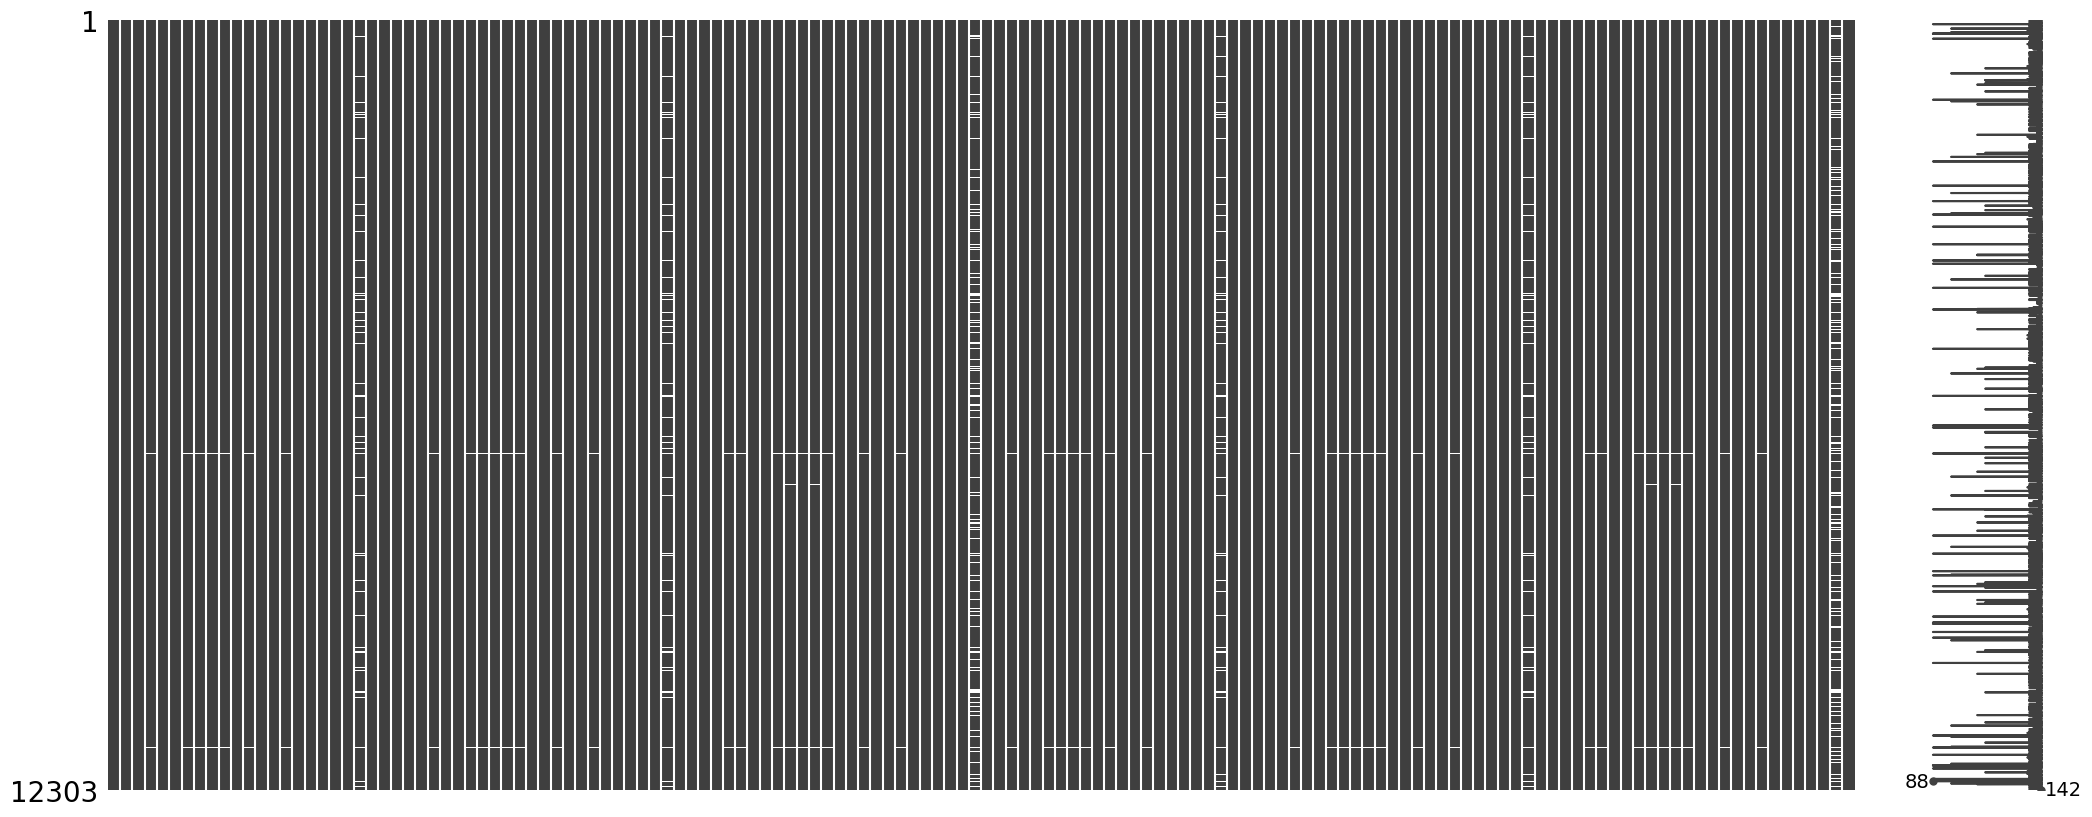

In [10]:
import missingno as msno

msno.matrix(train_home_team_statistics_df)

In [11]:
correlation_matrix = train_home_team_statistics_df.corr()

print("Correlation matrix between characteristics :")
correlation_matrix

Correlation matrix between characteristics :


TEAM_SHOTS_TOTAL_season_sum  \
TEAM_SHOTS_TOTAL_season_sum                                 1.000000   
TEAM_SHOTS_INSIDEBOX_season_sum                             0.765267   
TEAM_SHOTS_OFF_TARGET_season_sum                            0.737859   
TEAM_SHOTS_ON_TARGET_season_sum                             0.755312   
TEAM_SHOTS_OUTSIDEBOX_season_sum                            0.613226   
...                                                              ...   
TEAM_SUBSTITUTIONS_5_last_match_std                        -0.009538   
TEAM_BALL_SAFE_5_last_match_std                             0.035971   
TEAM_DANGEROUS_ATTACKS_5_last_match_std                     0.152345   
TEAM_INJURIES_5_last_match_std                             -0.033320   
TEAM_GOALS_5_last_match_std                                 0.199218   

                                         TEAM_SHOTS_INSIDEBOX_season_sum  \
TEAM_SHOTS_TOTAL_season_sum                                     0.765267   
TEAM_SHOTS_INSIDEBOX_season_sum                                 1.000000   
TEAM_SHOTS_OFF_TARGET_season_sum                                0.598686   
TEAM_SHOTS_ON_TARGET_season_sum                                 0.697897   
TEAM_SHOTS_OUTSIDEBOX_season_sum                                0.327797   
...                                                                  ...   
TEAM_SUBSTITUTIONS_5_last_match_std                             0.031944   
TEAM_BALL_SAFE_5_last_match_std                                 0.020183   
TEAM_DANGEROUS_ATTACKS_5_last_match_std                         0.148562   
TEAM_INJURIES_5_last_match_std                                 -0.055732   
TEAM_GOALS_5_last_match_std                                     0.218092   

                                         TEAM_SHOTS_OFF_TARGET_season_sum  \
TEAM_SHOTS_TOTAL_season_sum                                      0.737859   
TEAM_SHOTS_INSIDEBOX_season_sum                                  0.598686   
TEAM_SHOTS_OFF_TARGET_season_sum                                 1.000000   
TEAM_SHOTS_ON_TARGET_season_sum                                  0.530533   
TEAM_SHOTS_OUTSIDEBOX_season_sum                                 0.546027   
...                                                                   ...   
TEAM_SUBSTITUTIONS_5_last_match_std                              0.008515   
TEAM_BALL_SAFE_5_last_match_std                                  0.006769   
TEAM_DANGEROUS_ATTACKS_5_last_match_std                          0.132476   
TEAM_INJURIES_5_last_match_std                                  -0.005502   
TEAM_GOALS_5_last_match_std                                      0.105500   

                                         TEAM_SHOTS_ON_TARGET_season_sum  \
TEAM_SHOTS_TOTAL_season_sum                                     0.755312   
TEAM_SHOTS_INSIDEBOX_season_sum                                 0.697897   
TEAM_SHOTS_OFF_TARGET_season_sum                                0.530533   
TEAM_SHOTS_ON_TARGET_season_sum                                 1.000000   
TEAM_SHOTS_OUTSIDEBOX_season_sum                                0.437318   
...                                                                  ...   
TEAM_SUBSTITUTIONS_5_last_match_std                             0.019647   
TEAM_BALL_SAFE_5_last_match_std                                 0.024797   
TEAM_DANGEROUS_ATTACKS_5_last_match_std                         0.142125   
TEAM_INJURIES_5_last_match_std                                 -0.029941   
TEAM_GOALS_5_last_match_std                                     0.269715   

                                         TEAM_SHOTS_OUTSIDEBOX_season_sum  \
TEAM_SHOTS_TOTAL_season_sum                                      0.613226   
TEAM_SHOTS_INSIDEBOX_season_sum                                  0.327797   
TEAM_SHOTS_OFF_TARGET_season_sum                                 0.546027   
TEAM_SHOTS_ON_TARGET_season_sum                                  0.437318   
TEAM_SHOTS_OUTSIDEBOX_season_sum        

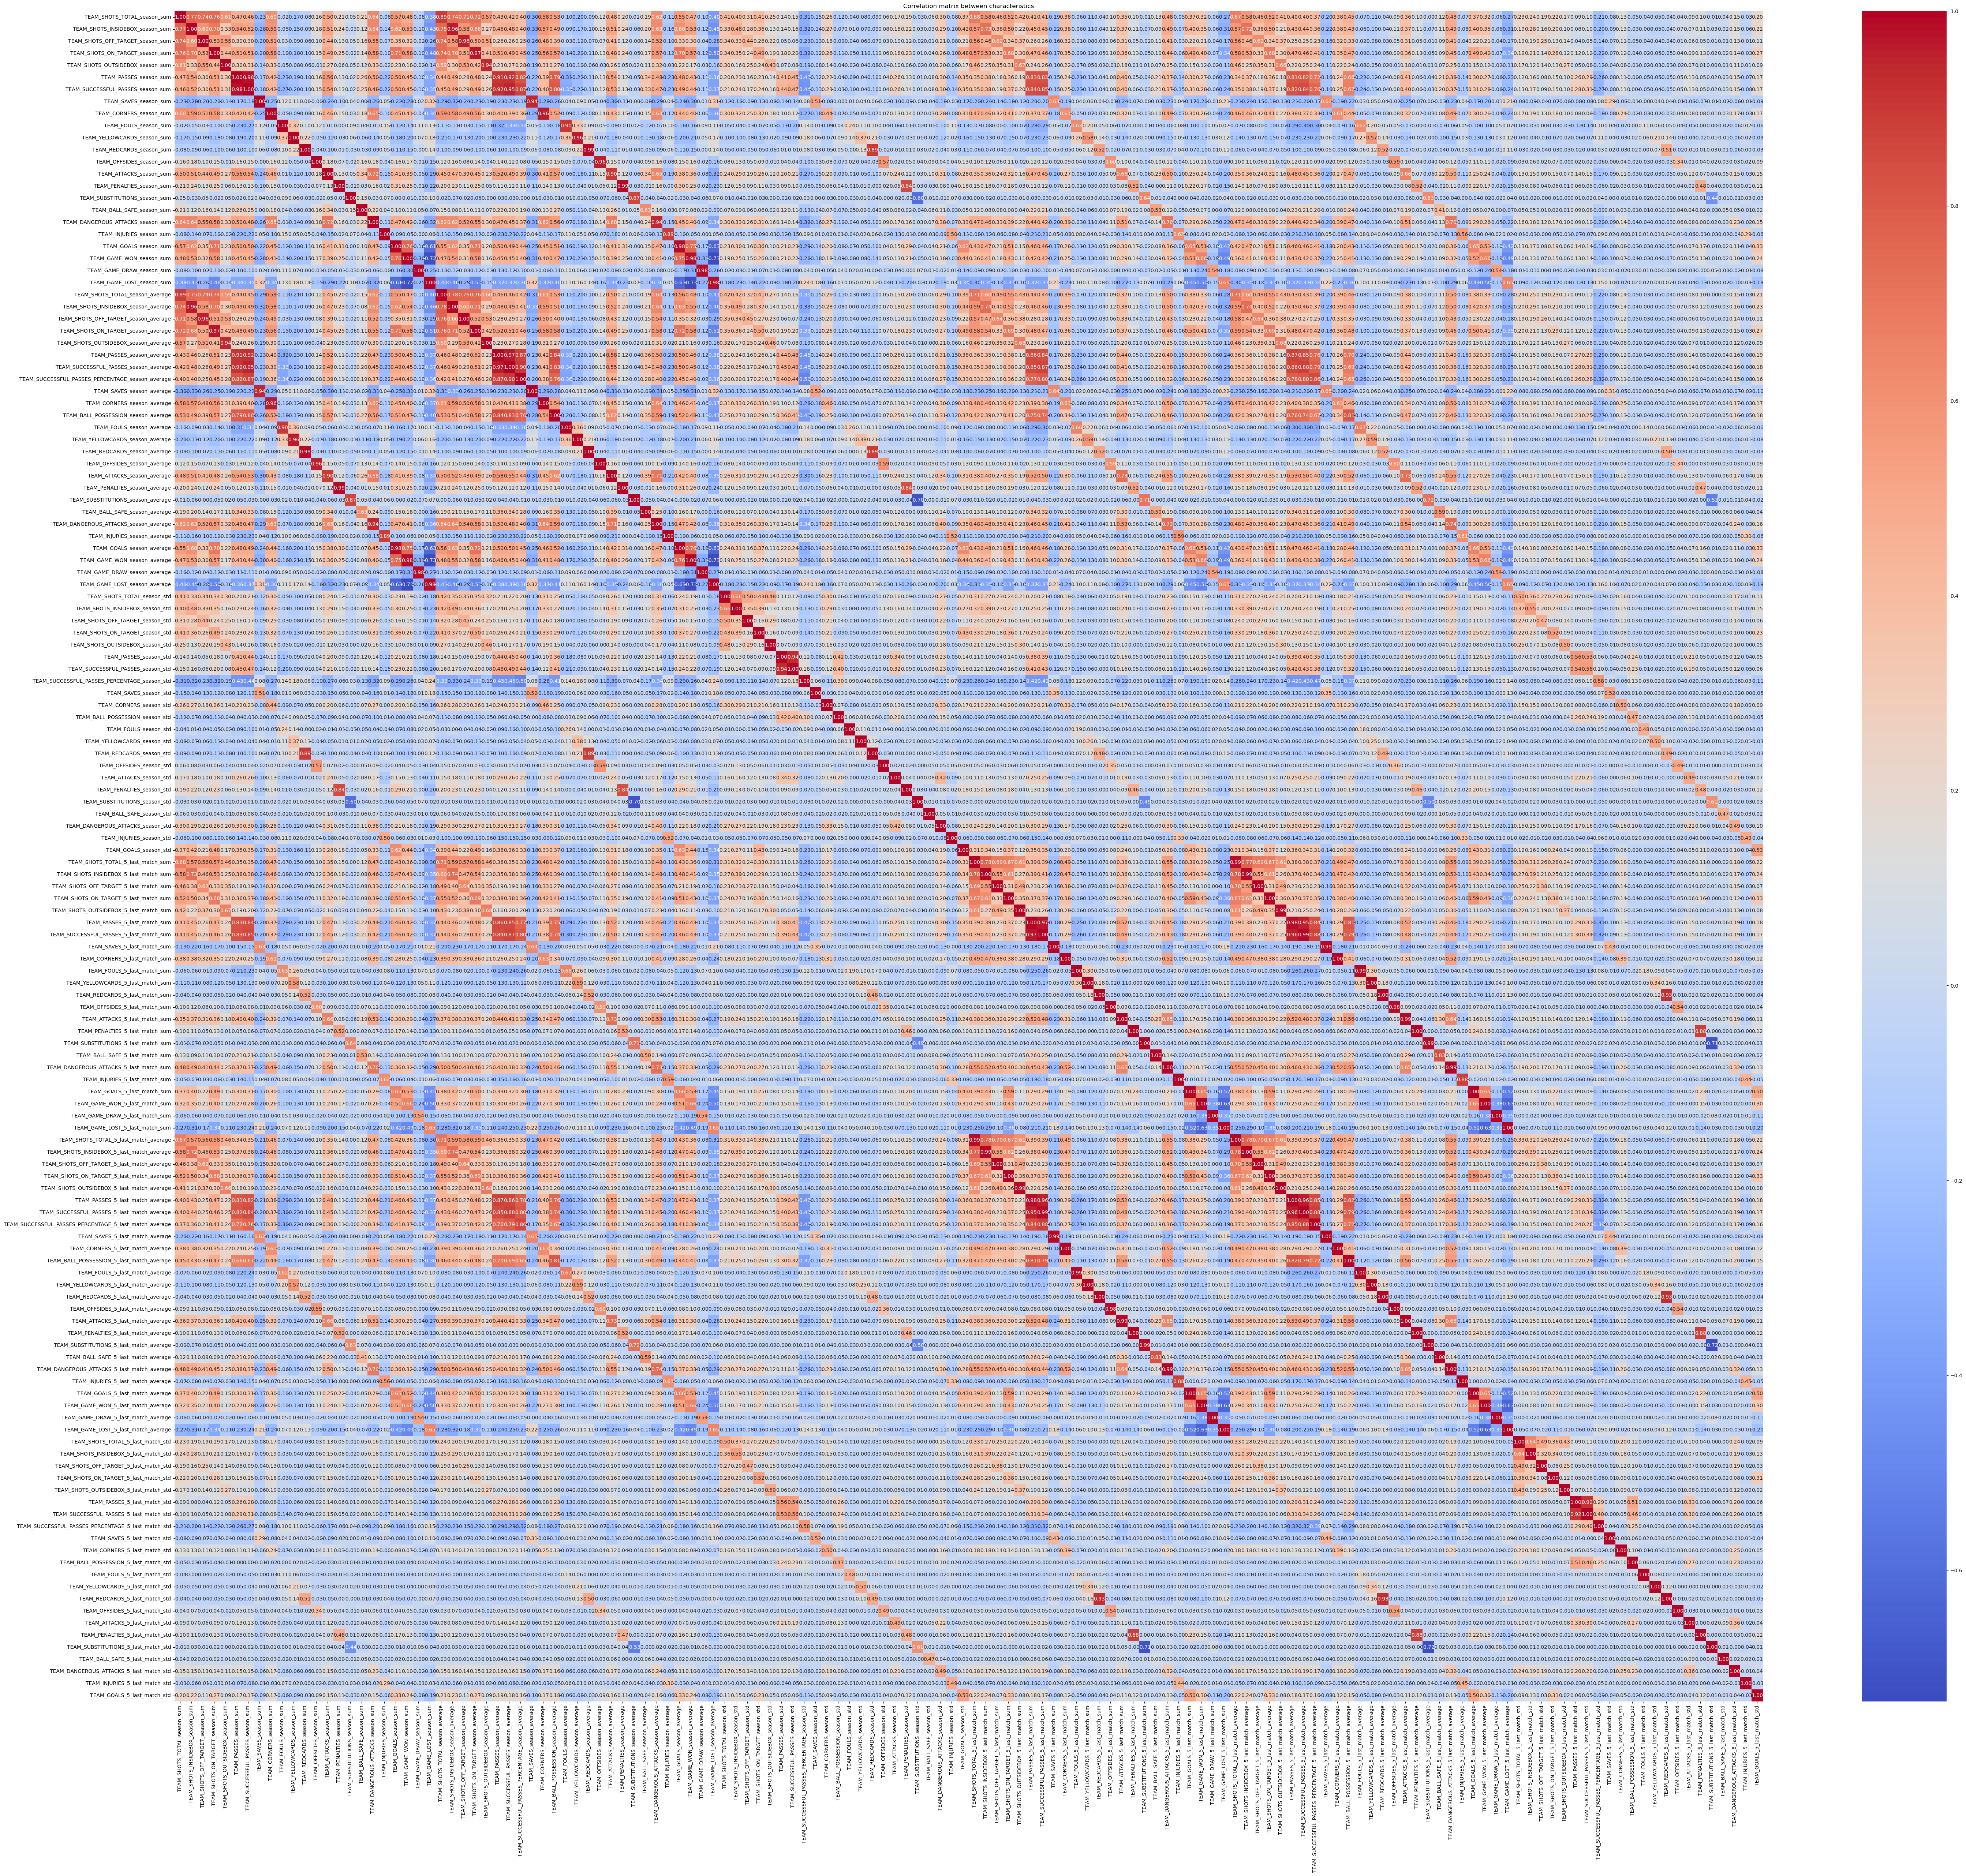

In [12]:
plt.figure(figsize = (70, 60))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation matrix between characteristics')
plt.show()

In [13]:
# Filter the correlation matrix to only include values > 0.85

filtered_correlation_matrix = correlation_matrix[(np.abs(correlation_matrix) > 0.9) & (correlation_matrix != 1)]

In [14]:
list_high_correlation_feature = []

for feature in filtered_correlation_matrix.columns:
    # We'll use a mask to locate where we have a value > 0.9 
    high_correlation_index = filtered_correlation_matrix.index[filtered_correlation_matrix[feature].notna()]
    
    if len(high_correlation_index) > 0:
        list_high_correlation_feature.append(high_correlation_index)
        
    for high_correlation_feature in high_correlation_index:
        # We exclude self-correlation
        if high_correlation_feature != feature:  
            print(f"Correlation between {feature} and {high_correlation_feature}: {filtered_correlation_matrix.loc[high_correlation_feature, feature]}")

Correlation between TEAM_SHOTS_INSIDEBOX_season_sum and TEAM_SHOTS_INSIDEBOX_season_average: 0.961593239427657
Correlation between TEAM_SHOTS_OFF_TARGET_season_sum and TEAM_SHOTS_OFF_TARGET_season_average: 0.9569978835491944
Correlation between TEAM_SHOTS_ON_TARGET_season_sum and TEAM_SHOTS_ON_TARGET_season_average: 0.9669422246128777
Correlation between TEAM_SHOTS_OUTSIDEBOX_season_sum and TEAM_SHOTS_OUTSIDEBOX_season_average: 0.9449135950698133
Correlation between TEAM_PASSES_season_sum and TEAM_SUCCESSFUL_PASSES_season_sum: 0.9784307166933167
Correlation between TEAM_PASSES_season_sum and TEAM_PASSES_season_average: 0.9052127498815847
Correlation between TEAM_PASSES_season_sum and TEAM_SUCCESSFUL_PASSES_season_average: 0.9174813136350779
Correlation between TEAM_SUCCESSFUL_PASSES_season_sum and TEAM_PASSES_season_sum: 0.9784307166933167
Correlation between TEAM_SUCCESSFUL_PASSES_season_sum and TEAM_PASSES_season_average: 0.9219790026271412
Correlation between TEAM_SUCCESSFUL_PASSES_

In [15]:
list_high_correlation_feature

[Index(['TEAM_SHOTS_INSIDEBOX_season_average'], dtype='object'),
 Index(['TEAM_SHOTS_OFF_TARGET_season_average'], dtype='object'),
 Index(['TEAM_SHOTS_ON_TARGET_season_average'], dtype='object'),
 Index(['TEAM_SHOTS_OUTSIDEBOX_season_average'], dtype='object'),
 Index(['TEAM_SUCCESSFUL_PASSES_season_sum', 'TEAM_PASSES_season_average',
        'TEAM_SUCCESSFUL_PASSES_season_average'],
       dtype='object'),
 Index(['TEAM_PASSES_season_sum', 'TEAM_PASSES_season_average',
        'TEAM_SUCCESSFUL_PASSES_season_average'],
       dtype='object'),
 Index(['TEAM_SAVES_season_average'], dtype='object'),
 Index(['TEAM_CORNERS_season_average'], dtype='object'),
 Index(['TEAM_FOULS_season_average'], dtype='object'),
 Index(['TEAM_YELLOWCARDS_season_average'], dtype='object'),
 Index(['TEAM_REDCARDS_season_average'], dtype='object'),
 Index(['TEAM_OFFSIDES_season_average'], dtype='object'),
 Index(['TEAM_PENALTIES_season_average'], dtype='object'),
 Index(['TEAM_DANGEROUS_ATTACKS_season_average']

In [16]:
# List to store the names of features to delete
list_of_features_to_be_removed = []

for idx in range(len(list_high_correlation_feature)):
    for feature_name in range(len(list_high_correlation_feature[idx])):
        feature_removed = list_high_correlation_feature[idx][feature_name]
        list_of_features_to_be_removed.append(feature_removed)
        
print(list_of_features_to_be_removed)   

['TEAM_SHOTS_INSIDEBOX_season_average', 'TEAM_SHOTS_OFF_TARGET_season_average', 'TEAM_SHOTS_ON_TARGET_season_average', 'TEAM_SHOTS_OUTSIDEBOX_season_average', 'TEAM_SUCCESSFUL_PASSES_season_sum', 'TEAM_PASSES_season_average', 'TEAM_SUCCESSFUL_PASSES_season_average', 'TEAM_PASSES_season_sum', 'TEAM_PASSES_season_average', 'TEAM_SUCCESSFUL_PASSES_season_average', 'TEAM_SAVES_season_average', 'TEAM_CORNERS_season_average', 'TEAM_FOULS_season_average', 'TEAM_YELLOWCARDS_season_average', 'TEAM_REDCARDS_season_average', 'TEAM_OFFSIDES_season_average', 'TEAM_PENALTIES_season_average', 'TEAM_DANGEROUS_ATTACKS_season_average', 'TEAM_GOALS_season_average', 'TEAM_GAME_WON_season_average', 'TEAM_GAME_DRAW_season_average', 'TEAM_GAME_LOST_season_average', 'TEAM_SHOTS_INSIDEBOX_season_sum', 'TEAM_SHOTS_OFF_TARGET_season_sum', 'TEAM_SHOTS_ON_TARGET_season_sum', 'TEAM_SHOTS_OUTSIDEBOX_season_sum', 'TEAM_PASSES_season_sum', 'TEAM_SUCCESSFUL_PASSES_season_sum', 'TEAM_SUCCESSFUL_PASSES_season_average', '

In [17]:
# Removing features in the DataFrame
train_home_team_statistics_df = train_home_team_statistics_df.drop(list_of_features_to_be_removed, axis = 1)

In [18]:
train_home_team_statistics_df

LEAGUE                TEAM_NAME  TEAM_SHOTS_TOTAL_season_sum  \
ID                                                                            
0             Ligue 1                 Toulouse                          3.0   
1             Ligue 2                    Brest                          6.0   
2             Serie A                Sampdoria                          4.0   
3          League One            Coventry City                          7.0   
4      Premier League  Wolverhampton Wanderers                          3.0   
...               ...                      ...                          ...   
12298      League One          Southend United                          4.0   
12299   Liga Portugal                 Boavista                          4.0   
12300      Bundesliga               Schalke 04                          4.0   
12301      League One           Fleetwood Town                          2.0   
12302         La Liga                 Valencia                          2.0   

       TEAM_ATTACKS_season_sum  TEAM_SUBSTITUTIONS_season_sum  \
ID                                                              
0                          2.0                            8.0   
1                          7.0                           10.0   
2                          4.0                           10.0   
3                          6.0                            3.0   
4                          4.0                            3.0   
...                        ...                            ...   
12298                      5.0                            5.0   
12299                      1.0                            6.0   
12300                      4.0                            9.0   
12301                      4.0                           10.0   
12302                      1.0                            8.0   

       TEAM_BALL_SAFE_season_sum  TEAM_INJURIES_season_sum  \
ID                                                           
0                            4.0                       0.0   
1                            9.0                       2.0   
2                            5.0                       8.0   
3                            3.0                       0.0   
4                            5.0                       4.0   
...                          ...                       ...   
12298                        1.0                       0.8   
12299                        0.0                       4.0   
12300                        6.0                       4.0   
12301                        2.0                       3.0   
12302                        3.0                       9.0   

       TEAM_SHOTS_TOTAL_season_average  TEAM_BALL_POSSESSION_season_average  \
ID                                                                            
0                                  3.0                                  1.0   
1                                  5.0                                  6.0   
2                                  4.0                                  1.0   
3                                  7.0                                  9.0   
4                                  2.0                                  4.0   
...                                ...                                  ...   
12298                              4.0                                  4.0   
12299                              4.0                                  1.0   
12300                              3.0                                  2.0   
12301                              2.0                                  3.0   
12302                              1.0                                  3.0   

       TEAM_ATTACKS_season_average  ...  TEAM_FOULS_5_last_match_std  \
ID                                  ...                                
0                              1.0  ...                       6.0000   
1                              4.0  ...                       3.0000   
2                 

In [19]:
train_home_team_statistics_df['TEAM_INJURIES_season_sum']

ID
0        0.0
1        2.0
2        8.0
3        0.0
4        4.0
        ... 
12298    0.8
12299    4.0
12300    4.0
12301    3.0
12302    9.0
Name: TEAM_INJURIES_season_sum, Length: 12303, dtype: float64

In [20]:
for column in train_home_team_statistics_df.columns:
        number_of_missing_data = train_home_team_statistics_df[column].isnull().sum()
        print(f"{column}: {number_of_missing_data}")

LEAGUE: 0
TEAM_NAME: 0
TEAM_SHOTS_TOTAL_season_sum: 0
TEAM_ATTACKS_season_sum: 0
TEAM_SUBSTITUTIONS_season_sum: 0
TEAM_BALL_SAFE_season_sum: 0
TEAM_INJURIES_season_sum: 811
TEAM_SHOTS_TOTAL_season_average: 0
TEAM_BALL_POSSESSION_season_average: 0
TEAM_ATTACKS_season_average: 0
TEAM_SUBSTITUTIONS_season_average: 0
TEAM_BALL_SAFE_season_average: 0
TEAM_INJURIES_season_average: 811
TEAM_SHOTS_TOTAL_season_std: 41
TEAM_SHOTS_INSIDEBOX_season_std: 113
TEAM_SHOTS_OFF_TARGET_season_std: 0
TEAM_SHOTS_ON_TARGET_season_std: 0
TEAM_SHOTS_OUTSIDEBOX_season_std: 113
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std: 126
TEAM_SAVES_season_std: 61
TEAM_CORNERS_season_std: 0
TEAM_BALL_POSSESSION_season_std: 0
TEAM_FOULS_season_std: 61
TEAM_YELLOWCARDS_season_std: 0
TEAM_REDCARDS_season_std: 0
TEAM_OFFSIDES_season_std: 61
TEAM_ATTACKS_season_std: 0
TEAM_PENALTIES_season_std: 0
TEAM_SUBSTITUTIONS_season_std: 0
TEAM_BALL_SAFE_season_std: 45
TEAM_DANGEROUS_ATTACKS_season_std: 0
TEAM_INJURIES_season_std: 1578
T

<AxesSubplot:>

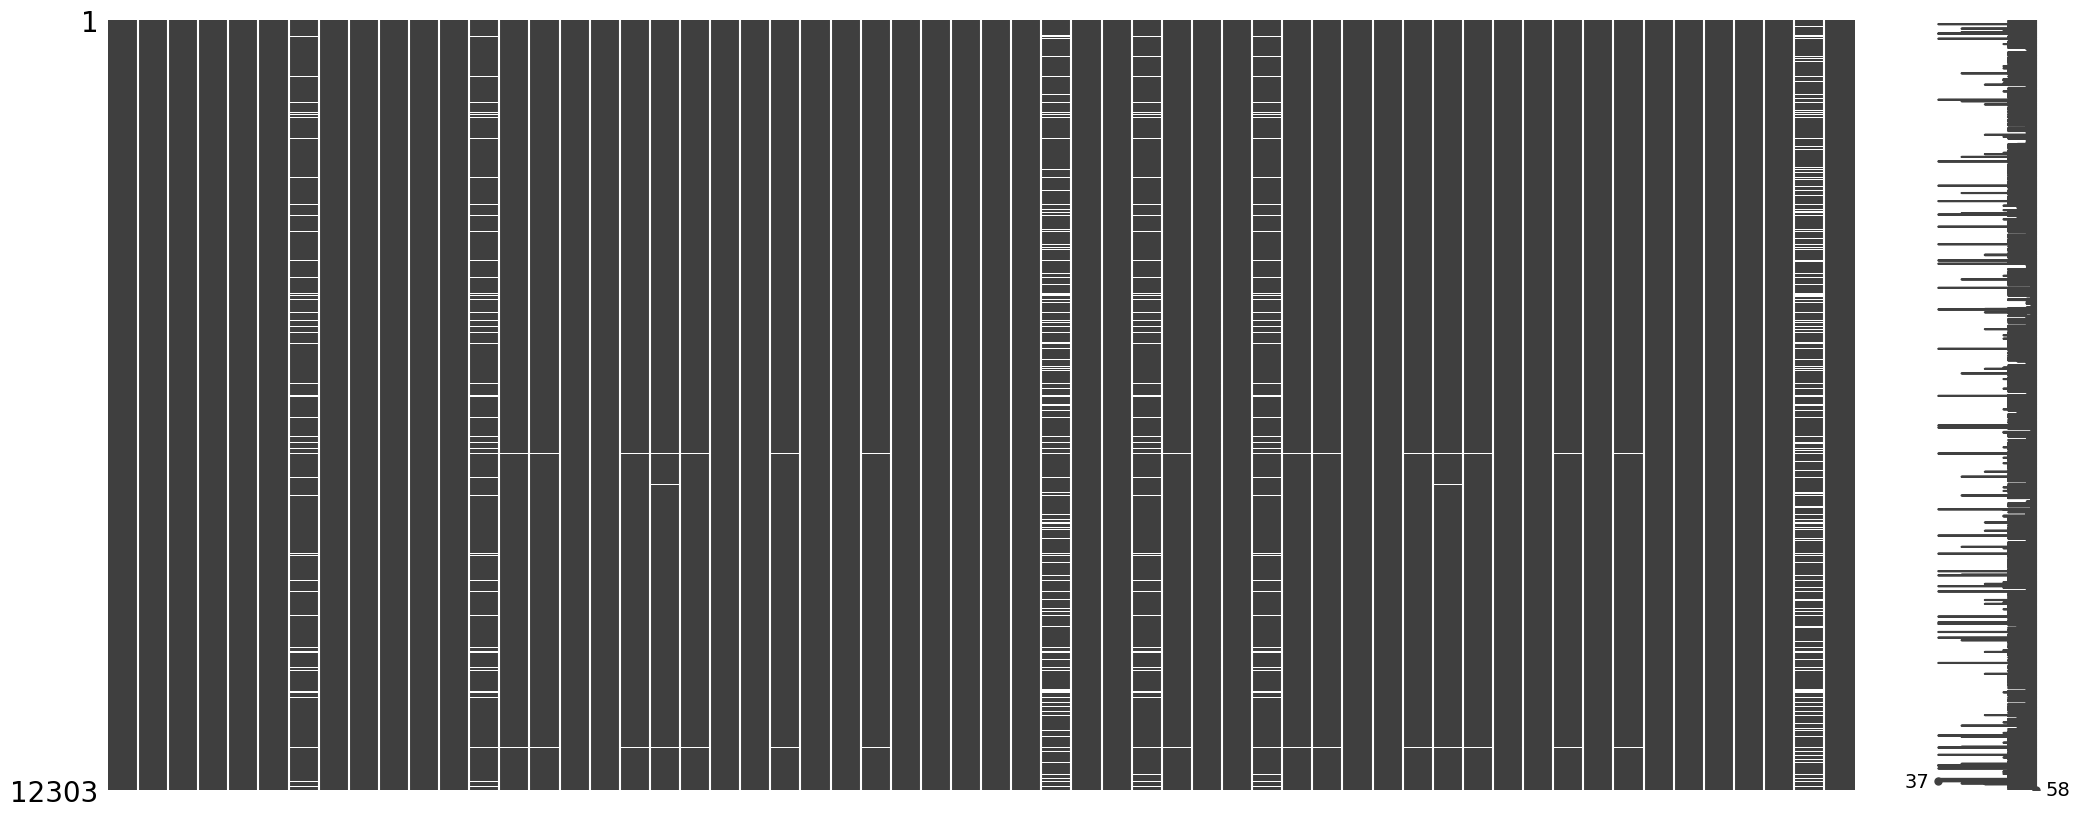

In [21]:
msno.matrix(train_home_team_statistics_df)

In [22]:
list_of_features_to_be_removed = ['TEAM_INJURIES_season_sum', 'TEAM_INJURIES_season_average', 'TEAM_INJURIES_season_std',
                                  'TEAM_INJURIES_5_last_match_sum', 'TEAM_INJURIES_5_last_match_average', 'TEAM_INJURIES_5_last_match_std']

train_home_team_statistics_df = train_home_team_statistics_df.drop(list_of_features_to_be_removed, axis = 1)

In [23]:
for column in train_home_team_statistics_df.columns:
        number_of_missing_data = train_home_team_statistics_df[column].isnull().sum()
        print(f"{column}: {number_of_missing_data}")

LEAGUE: 0
TEAM_NAME: 0
TEAM_SHOTS_TOTAL_season_sum: 0
TEAM_ATTACKS_season_sum: 0
TEAM_SUBSTITUTIONS_season_sum: 0
TEAM_BALL_SAFE_season_sum: 0
TEAM_SHOTS_TOTAL_season_average: 0
TEAM_BALL_POSSESSION_season_average: 0
TEAM_ATTACKS_season_average: 0
TEAM_SUBSTITUTIONS_season_average: 0
TEAM_BALL_SAFE_season_average: 0
TEAM_SHOTS_TOTAL_season_std: 41
TEAM_SHOTS_INSIDEBOX_season_std: 113
TEAM_SHOTS_OFF_TARGET_season_std: 0
TEAM_SHOTS_ON_TARGET_season_std: 0
TEAM_SHOTS_OUTSIDEBOX_season_std: 113
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std: 126
TEAM_SAVES_season_std: 61
TEAM_CORNERS_season_std: 0
TEAM_BALL_POSSESSION_season_std: 0
TEAM_FOULS_season_std: 61
TEAM_YELLOWCARDS_season_std: 0
TEAM_REDCARDS_season_std: 0
TEAM_OFFSIDES_season_std: 61
TEAM_ATTACKS_season_std: 0
TEAM_PENALTIES_season_std: 0
TEAM_SUBSTITUTIONS_season_std: 0
TEAM_BALL_SAFE_season_std: 45
TEAM_DANGEROUS_ATTACKS_season_std: 0
TEAM_GOALS_season_std: 0
TEAM_BALL_SAFE_5_last_match_sum: 0
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_

In [24]:
# We divide the original dataset in 13 datasets (one for each team)

Ligue_1 = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Ligue 1']

Ligue_2 = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Ligue 2']

Serie_A = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Serie A']

League_One = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'League One']

Premier_League = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Premier League']

Liga_Portugal = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Liga Portugal']

La_Liga = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'La Liga']

Superliga = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Superliga']

Bundesliga = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Bundesliga']

Pro_League = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Pro League']

J_League = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'J-League']

League_Two = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'League Two']

Eredivisie = train_home_team_statistics_df[train_home_team_statistics_df['LEAGUE'] == 'Eredivisie']

In [25]:
for column in Ligue_2.columns:
        number_of_missing_data = Ligue_2[column].isnull().sum()
        print(f"{column}: {number_of_missing_data}")

LEAGUE: 0
TEAM_NAME: 0
TEAM_SHOTS_TOTAL_season_sum: 0
TEAM_ATTACKS_season_sum: 0
TEAM_SUBSTITUTIONS_season_sum: 0
TEAM_BALL_SAFE_season_sum: 0
TEAM_SHOTS_TOTAL_season_average: 0
TEAM_BALL_POSSESSION_season_average: 0
TEAM_ATTACKS_season_average: 0
TEAM_SUBSTITUTIONS_season_average: 0
TEAM_BALL_SAFE_season_average: 0
TEAM_SHOTS_TOTAL_season_std: 0
TEAM_SHOTS_INSIDEBOX_season_std: 0
TEAM_SHOTS_OFF_TARGET_season_std: 0
TEAM_SHOTS_ON_TARGET_season_std: 0
TEAM_SHOTS_OUTSIDEBOX_season_std: 0
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std: 0
TEAM_SAVES_season_std: 0
TEAM_CORNERS_season_std: 0
TEAM_BALL_POSSESSION_season_std: 0
TEAM_FOULS_season_std: 0
TEAM_YELLOWCARDS_season_std: 0
TEAM_REDCARDS_season_std: 0
TEAM_OFFSIDES_season_std: 0
TEAM_ATTACKS_season_std: 0
TEAM_PENALTIES_season_std: 0
TEAM_SUBSTITUTIONS_season_std: 0
TEAM_BALL_SAFE_season_std: 33
TEAM_DANGEROUS_ATTACKS_season_std: 0
TEAM_GOALS_season_std: 0
TEAM_BALL_SAFE_5_last_match_sum: 0
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match

In [26]:
teams_with_missing_values = Ligue_2.loc[Ligue_2['TEAM_BALL_SAFE_season_std'].isna()]

print(teams_with_missing_values)

        LEAGUE  TEAM_NAME  TEAM_SHOTS_TOTAL_season_sum  \
ID                                                       
385    Ligue 2  Dunkerque                          0.0   
639    Ligue 2  Dunkerque                          0.0   
989    Ligue 2        Pau                          1.0   
1980   Ligue 2  Dunkerque                          1.0   
2208   Ligue 2        Pau                          3.0   
2280   Ligue 2  Dunkerque                          1.0   
2385   Ligue 2        Pau                          3.0   
2527   Ligue 2        Pau                          1.0   
2695   Ligue 2        Pau                          1.0   
2842   Ligue 2        Pau                          1.0   
3000   Ligue 2  Dunkerque                          0.0   
3318   Ligue 2        Pau                          3.0   
3517   Ligue 2        Pau                          2.0   
4831   Ligue 2        Pau                          1.0   
5454   Ligue 2  Dunkerque                          0.0   
6272   Ligue 2

In [27]:
# We are making new dataframes for each team in a specific league.

Ligue_2_by_teams = {}

for team, data in Ligue_2.groupby('TEAM_NAME'):
    Ligue_2_by_teams[team] = data.copy()

In [28]:
# We are creating a dictionary to recover every mean for each feature in every team.

teams_average = {}

for team, dataframe in Ligue_2_by_teams.items():
    numeric_columns = dataframe.select_dtypes(include = ['int', 'float'])
    columns_average = numeric_columns.mean()
    teams_average[team] = columns_average

for team, means in teams_average.items():
    print(f"Means for {team}:")
    print(means)
    print()

Means for Ajaccio:
TEAM_SHOTS_TOTAL_season_sum                               2.690476
TEAM_ATTACKS_season_sum                                   7.571429
TEAM_SUBSTITUTIONS_season_sum                             6.142857
TEAM_BALL_SAFE_season_sum                                 7.071429
TEAM_SHOTS_TOTAL_season_average                           2.023810
TEAM_BALL_POSSESSION_season_average                       5.571429
TEAM_ATTACKS_season_average                               6.380952
TEAM_SUBSTITUTIONS_season_average                         4.714286
TEAM_BALL_SAFE_season_average                             5.547619
TEAM_SHOTS_TOTAL_season_std                               4.404762
TEAM_SHOTS_INSIDEBOX_season_std                           3.738095
TEAM_SHOTS_OFF_TARGET_season_std                          3.500000
TEAM_SHOTS_ON_TARGET_season_std                           3.500000
TEAM_SHOTS_OUTSIDEBOX_season_std                          4.595238
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_st

In [29]:
def minimize_mean_difference(league_by_teams, reference_team = 'Pau', features = None):

    reference_df = league_by_teams[reference_team]
    
    if features is None:
        features = reference_df.select_dtypes(include=['int', 'float']).columns
    
    reference_means = reference_df[features].mean()
    
    mean_differences = {}
    
    for team, dataframe in league_by_teams.items():
        numeric_columns = dataframe.select_dtypes(include=['int', 'float'])
        team_means = numeric_columns[features].mean()
        differences = (team_means - reference_means).abs()
        total_difference = differences.sum()
        mean_differences[team] = total_difference

    sorted_mean_differences = dict(sorted(mean_differences.items(), key = lambda item: item[1]))
    
    return sorted_mean_differences

In [30]:
minimize_mean_difference(Ligue_2_by_teams, 
                         features = ['TEAM_BALL_SAFE_season_sum', 'TEAM_BALL_SAFE_season_average',
                                     'TEAM_BALL_SAFE_5_last_match_sum', 'TEAM_BALL_SAFE_5_last_match_average'])

{'Pau': 0.0,
 'Châteauroux': 1.544444444444443,
 'Troyes': 1.5595238095238102,
 'Amiens SC': 2.666666666666668,
 'Guingamp': 3.0261437908496727,
 'Niort': 3.107142857142858,
 'Le Havre': 3.107946026986509,
 'Gazélec Ajaccio': 3.125,
 'Grenoble Foot 38': 3.137931034482758,
 'Auxerre': 3.2777777777777795,
 'Paris': 3.5,
 'Lens': 3.655172413793104,
 'Brest': 3.6875,
 'Lorient': 3.793103448275862,
 'Red Star': 4.25,
 'Rodez': 4.391608391608392,
 'Caen': 4.4421906693711986,
 'Le Mans': 4.545454545454545,
 'Sochaux': 4.652597402597403,
 'Orléans': 4.75,
 'Nancy': 5.1978114478114446,
 'Clermont': 7.238095238095237,
 'Chambly': 7.476190476190477,
 'Béziers': 7.777777777777777,
 'Ajaccio': 8.06349206349206,
 'Valenciennes': 8.25974025974026,
 'Metz': 9.5625,
 'Toulouse': 11.825708061002178,
 'Dunkerque': 12.0}

In [31]:
Ligue_2_by_teams['Pau']['TEAM_BALL_SAFE_5_last_match_average'].mean()

4.0

In [32]:
Ligue_2_by_teams['Châteauroux']['TEAM_BALL_SAFE_5_last_match_average'].mean()

4.533333333333332

In [33]:
# Now, we normalize the data.



In [34]:
feature_1 = Toulouse['TEAM_SHOTS_TOTAL_season_sum'].values
feature_2 = Toulouse['TEAM_SHOTS_OFF_TARGET_season_sum'].values

statistique, p_value = ttest_ind(feature_1, feature_2)

print(p_value)

if p_value < 0.05:
    print("The null hypothesis is rejected")
else:
    print("The null hypothesis cannot be rejected")

NameError: name 'Toulouse' is not defined

In [ ]:
print("Number of missing data per column :")

for column in Toulouse.columns:
    number_of_missing_data = Toulouse[column].isnull().sum()
    print(f"{column}: {number_of_missing_data}")

In [ ]:
numeric_columns = train_home_team_statistics_df.select_dtypes(include = ['number'])

variances = numeric_columns.var()

plt.figure(figsize = (60, 30))
variances.plot(kind = 'bar')
plt.title('Distribution of Variances')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
print("Number of missing data per column :")

for column in Ligue_1.columns:
    number_of_missing_data = Ligue_1[column].isnull().sum()
    print(f"{column}: {number_of_missing_data}")

In [ ]:
for column in Ligue_1.columns:
    if pd.api.types.is_numeric_dtype(Ligue_1[column]):
        column_mean = Ligue_1[column].mean()
        print(f"Average of the column '{column}' : {column_mean}")

In [ ]:
for column in Ligue_1.columns:
    if pd.api.types.is_numeric_dtype(Ligue_1[column]):
        column_var = Ligue_1[column].var()
        print(f"Average of the column '{column}' : {column_var}")

In [ ]:
print("Number of missing data per column :")

for column in Ligue_2.columns:
    number_of_missing_data = Ligue_2[column].isnull().sum()
    print(f"{column}: {number_of_missing_data}")

In [ ]:
print(len(Ligue_2['TEAM_BALL_SAFE_season_std']))

In [ ]:
print(Ligue_2['TEAM_BALL_SAFE_season_std'].mean())

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_BALL_SAFE_season_std'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team ball safe season std')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_INJURIES_season_std'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team injuries season std')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_BALL_SAFE_5_last_match_sum'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team ball safe 5 last match sum')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_INJURIES_5_last_match_sum'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team injuries 5 last match sum')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_BALL_SAFE_5_last_match_average'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team ball safe 5 last match average')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_INJURIES_5_last_match_average'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team unjuries 5 last match average')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_BALL_SAFE_5_last_match_std'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team ball safe 5 last match std')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(Ligue_2['TEAM_INJURIES_5_last_match_std'], bins = 30, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Team injuries 5 last match std')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
for column in Ligue_2.columns:
    if pd.api.types.is_numeric_dtype(Ligue_2[column]):
        column_mean = Ligue_2[column].mean()
        print(f"Average of the column '{column}' : {column_mean}")

In [ ]:
for column in Ligue_2.columns:
    if pd.api.types.is_numeric_dtype(Ligue_2[column]):
        column_var = Ligue_2[column].var()
        print(f"Average of the column '{column}' : {column_var}")

In [ ]:
# Rows with missing values are removed

Ligue_2 = Ligue_2.dropna(axis = 0)

In [ ]:
Ligue_2

In [ ]:
plt.figure(figsize = (70, 60))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation matrix between characteristics')
plt.show()

In [ ]:
# Preprocess the data
train_home = train_home_team_statistics_df.iloc[:, 2:]
train_away = train_away_team_statistics_df.iloc[:, 2:]
train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns
train_data = pd.concat([train_home, train_away], join='inner', axis=1)
train_scores = train_scores.loc[train_data.index]
train_data = train_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Impute missing values
imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

train_new_y = train_scores['AWAY_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data_imputed, train_new_y, train_size=0.8, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load
train_home_team_statistics_df = pd.read_csv('Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('Y_train_1rknArQ.csv', index_col=0)


# Preprocess
train_home = train_home_team_statistics_df.iloc[:, 2:]
train_away = train_away_team_statistics_df.iloc[:, 2:]
train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns
train_data = pd.concat([train_home, train_away], join='inner', axis=1)
train_scores = train_scores.loc[train_data.index]
train_data = train_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Imput missing values
imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

train_new_y_HOME_WINS = train_scores['HOME_WINS']
train_new_y_DRAW = train_scores['DRAW']
train_new_y_AWAY_WINS = train_scores['AWAY_WINS']

# Split the data
X_train, X_test, y_train_HOME_WINS, y_test_HOME_WINS = train_test_split(train_data_imputed, train_new_y_HOME_WINS, train_size=0.8, random_state=42)
X_train, X_test, y_train_DRAW, y_test_DRAW = train_test_split(train_data_imputed, train_new_y_DRAW, train_size=0.8, random_state=43)
X_train, X_test, y_train_AWAY_WINS, y_test_AWAY_WINS = train_test_split(train_data_imputed, train_new_y_AWAY_WINS, train_size=0.8, random_state=44)

# Training
clf_HOME_WINS = RandomForestClassifier(n_estimators=100, random_state=42)
clf_HOME_WINS.fit(X_train, y_train_HOME_WINS)
clf_DRAW = RandomForestClassifier(n_estimators=100, random_state=42)
clf_DRAW.fit(X_train, y_train_DRAW)
clf_AWAY_WINS = RandomForestClassifier(n_estimators=100, random_state=42)
clf_AWAY_WINS.fit(X_train, y_train_AWAY_WINS)


# Get the probability estimates for each class
probabilities_HOME_WINS = clf_HOME_WINS.predict_proba(X_test)
probabilities_DRAW = clf_DRAW.predict_proba(X_test)
probabilities_AWAY_WINS = clf_AWAY_WINS.predict_proba(X_test)

# Create a matrix to store the final predictions
final_predictions = np.zeros((2461, 3))

# Determine the column index with the highest positive probability for each observation
index_max_proba = np.argmax(np.column_stack([probabilities_HOME_WINS[:, 0], probabilities_DRAW[:, 0], probabilities_AWAY_WINS[:, 0]]), axis=1)

# Set the corresponding column to 1 for each observation
final_predictions[np.arange(len(final_predictions)), index_max_proba] = 1

# Print the final predictions
print("Final Predictions Matrix:")
print(final_predictions) # Calculer l'accuracy final_predictions

In [ ]:
# Count the occurrences of each class in the predictions
class_counts = np.sum(final_predictions, axis=0)

# Plot the distribution
classes = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
plt.bar(classes, class_counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Predictions')
plt.show()